In [65]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

In [67]:
#load the data
zoo_data=pd.read_csv("Downloads/KNN/KNN/Zoo.csv")
#Exploratory Datasets
print("Total missing Values in the zoo dataset:",zoo_data.isna().sum().sum())
#find duplicates in  dataset
print("No.of duplicate in zoo datasets:",end=" ")
print(zoo_data.duplicated().sum()) 
zoo_data=zoo_data.drop_duplicates()
#check any duplicate in dataset after drop
print("No.of duplicate in datasets after drop:",end=" ")
print(zoo_data.duplicated().sum())
#Select categorical data
print(zoo_data.info())
print(zoo_data.head())

Total missing Values in the zoo dataset: 0
No.of duplicate in zoo datasets: 0
No.of duplicate in datasets after drop: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int

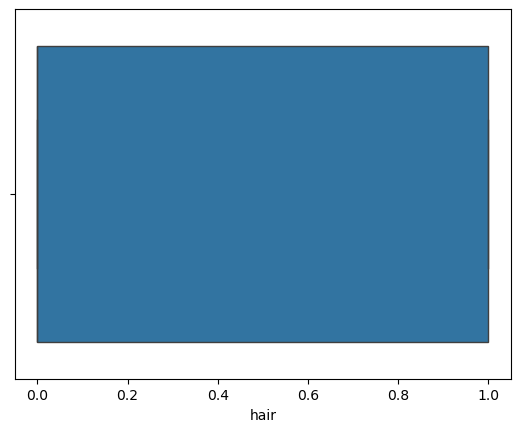

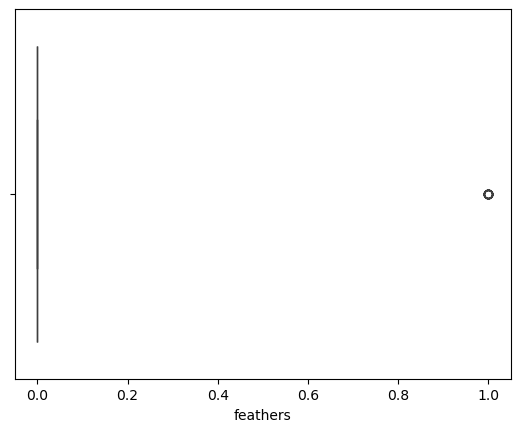

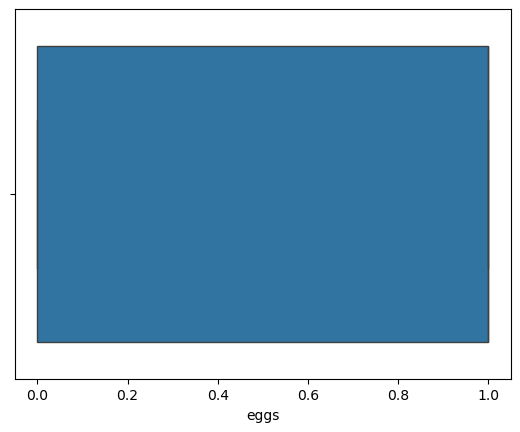

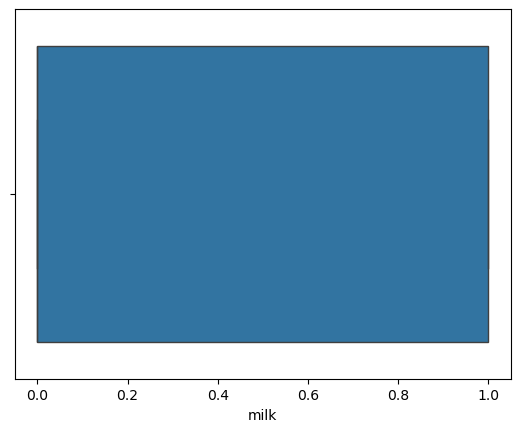

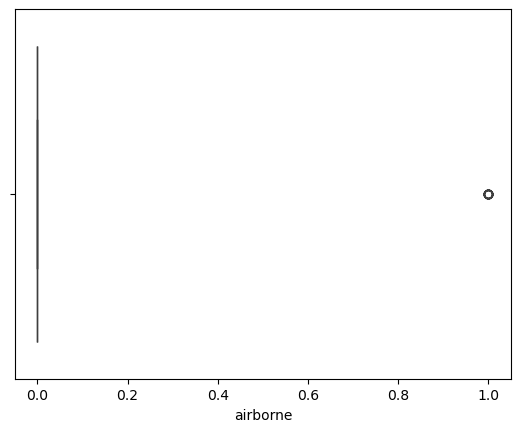

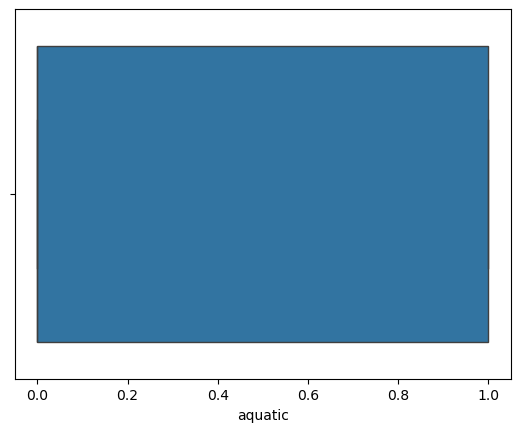

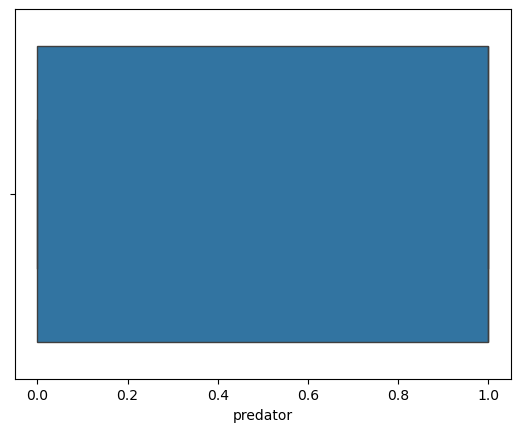

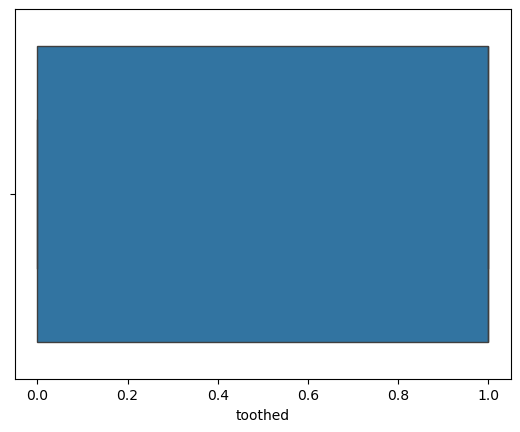

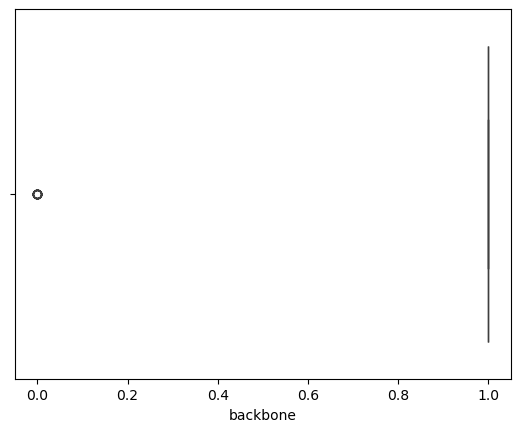

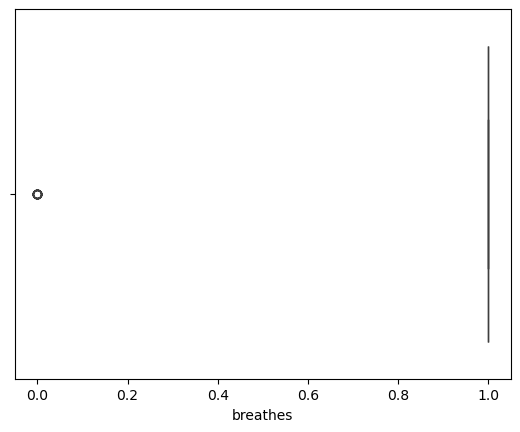

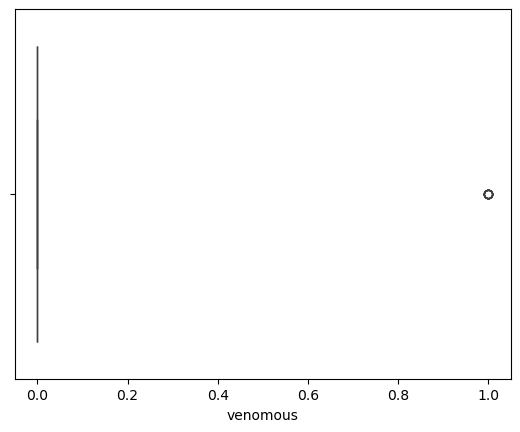

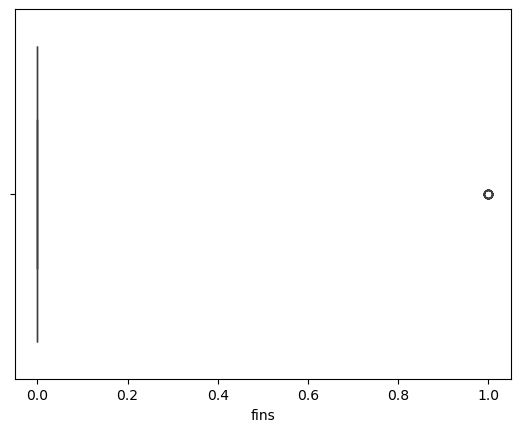

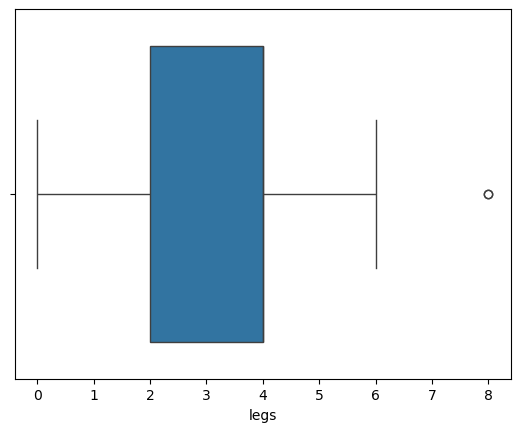

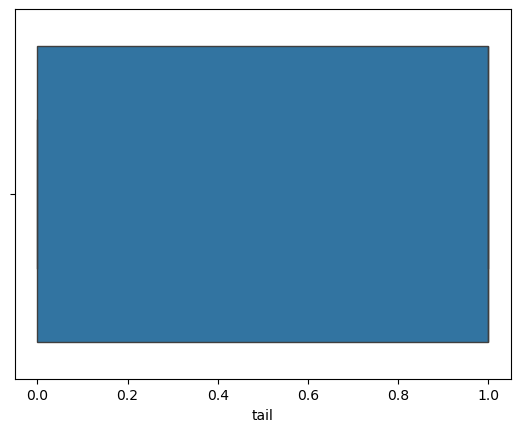

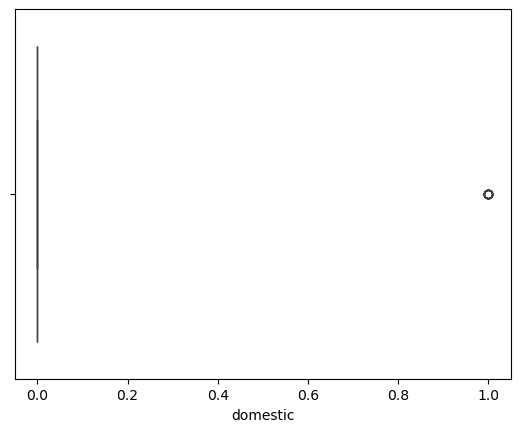

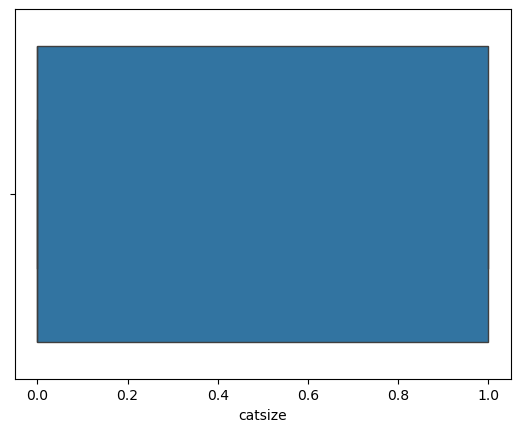

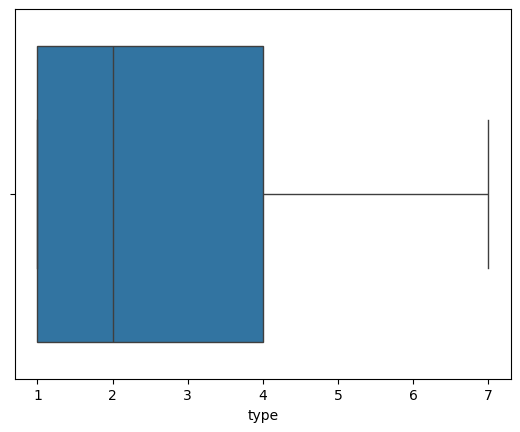

In [9]:
##Find outliers using boxplot for  dataset
for i in zoo_data.select_dtypes(include="number").columns:
    sns.boxplot(data=zoo_data,x=i)
    plt.show()

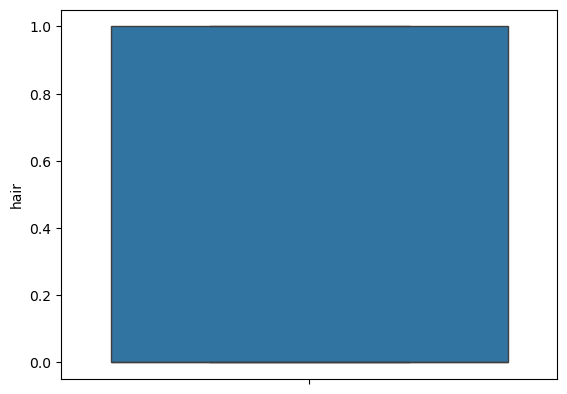

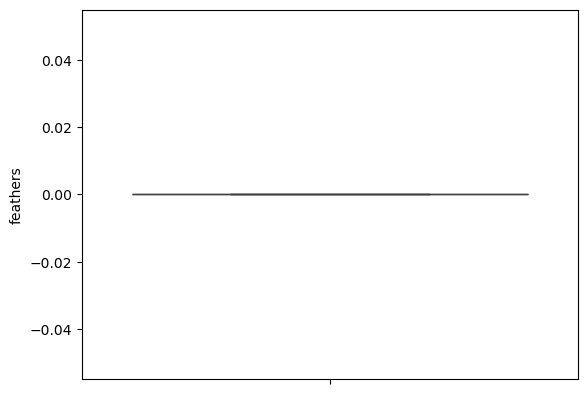

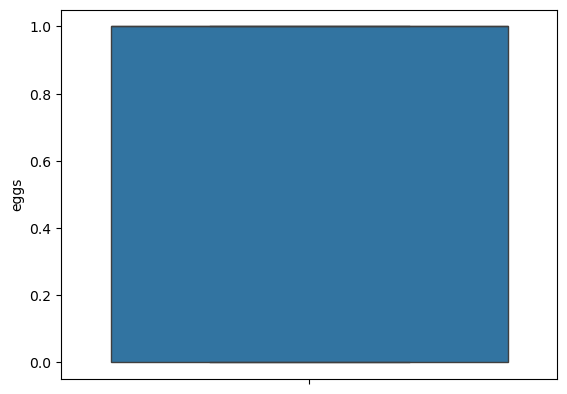

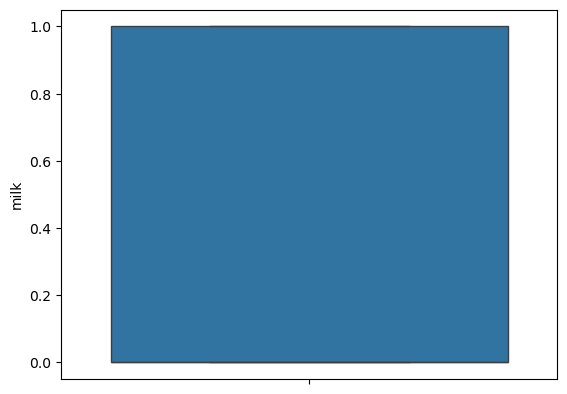

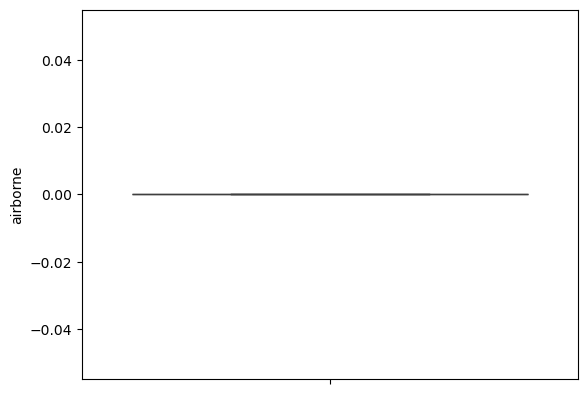

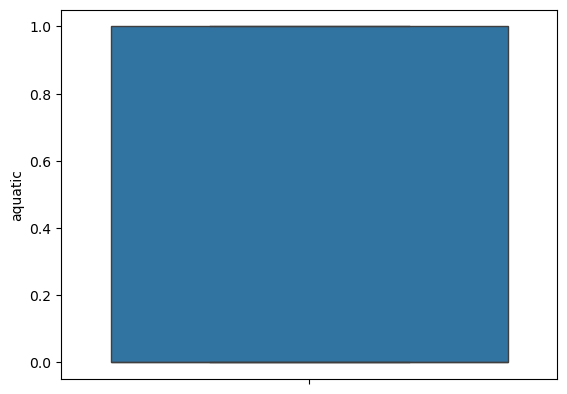

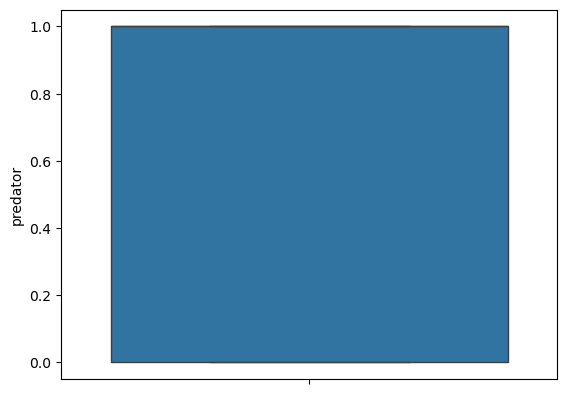

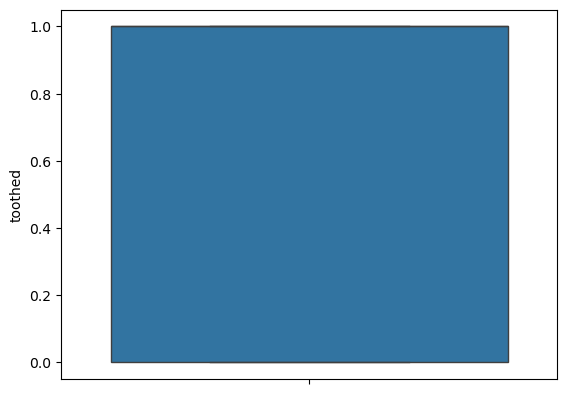

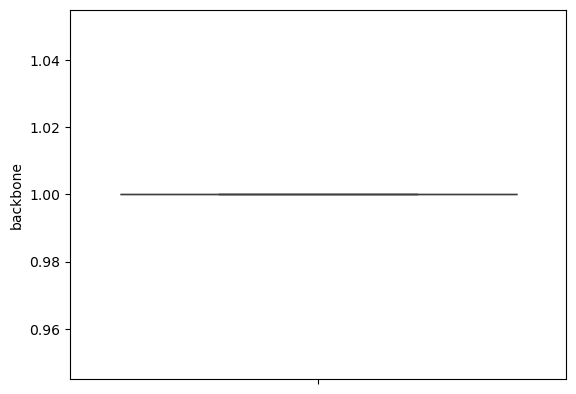

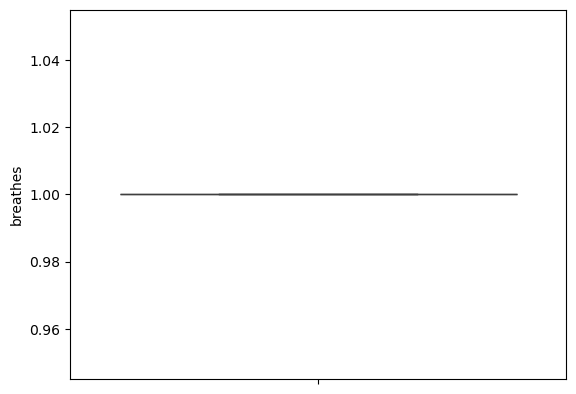

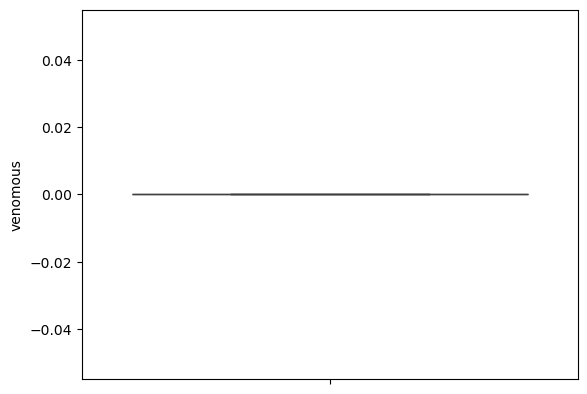

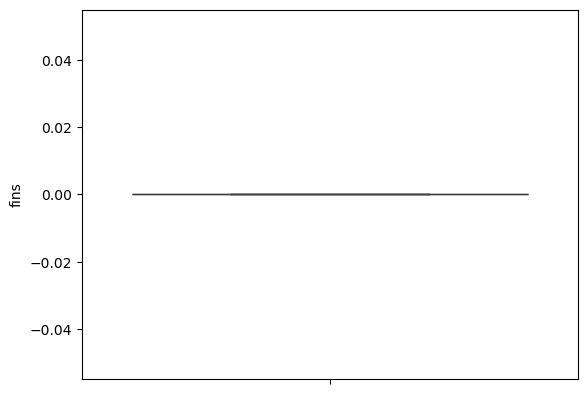

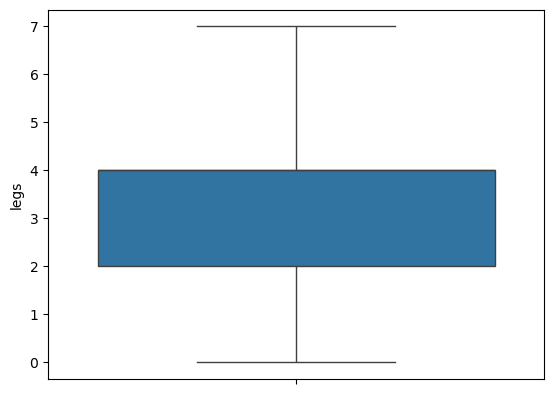

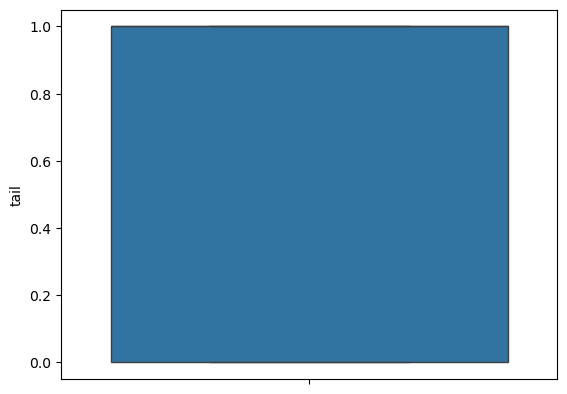

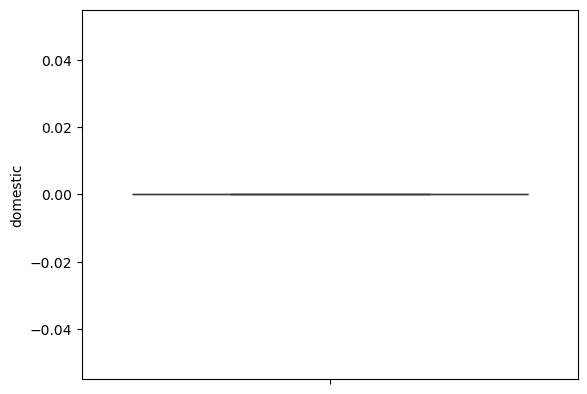

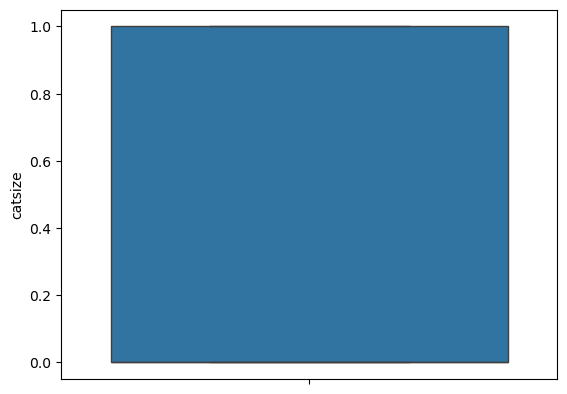

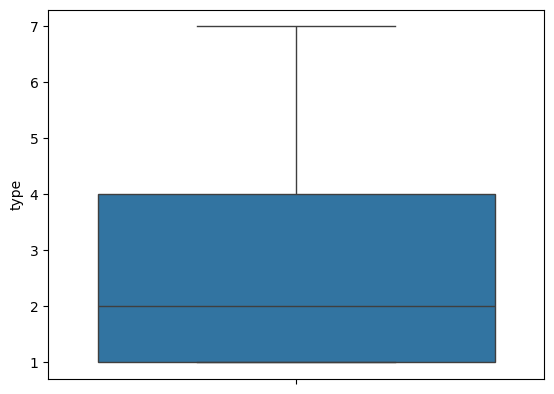

In [11]:
#Treatment for outliers/boxplot capping for  data
def remove_outlier(col):
    q1,q3=np.percentile(col,[25,75])
    IQR=q3-q1
    lowerbound=q1-(1.5*(IQR))
    upperbound=q3+(1.5*(IQR))
    return lowerbound,upperbound
for i in zoo_data.select_dtypes(include="number").columns:
    lower,upper=remove_outlier(zoo_data[i])
    zoo_data[i]=np.where(zoo_data[i]<lower,lower,zoo_data[i])
    zoo_data[i]=np.where(zoo_data[i]>upper,upper,zoo_data[i])

#box plot after capping  train dataset
for i in zoo_data.select_dtypes(include="number").columns:
    sns.boxplot(zoo_data[i])
    plt.show()

In [13]:
#summary data
print("The Five summary for data:\n")
print(zoo_data.describe())

The Five summary for data:

             hair  feathers        eggs        milk  airborne     aquatic  \
count  101.000000     101.0  101.000000  101.000000     101.0  101.000000   
mean     0.425743       0.0    0.584158    0.405941       0.0    0.356436   
std      0.496921       0.0    0.495325    0.493522       0.0    0.481335   
min      0.000000       0.0    0.000000    0.000000       0.0    0.000000   
25%      0.000000       0.0    0.000000    0.000000       0.0    0.000000   
50%      0.000000       0.0    1.000000    0.000000       0.0    0.000000   
75%      1.000000       0.0    1.000000    1.000000       0.0    1.000000   
max      1.000000       0.0    1.000000    1.000000       0.0    1.000000   

         predator     toothed  backbone  breathes  venomous   fins  \
count  101.000000  101.000000     101.0     101.0     101.0  101.0   
mean     0.554455    0.603960       1.0       1.0       0.0    0.0   
std      0.499505    0.491512       0.0       0.0       0.0    0.0  

In [69]:
#Feature Engineering
#label encoding for categorical data
#convert the categorical variable into numerical variable for data

zoo_data["animal name"]=zoo_data["animal name"].astype('category')
zoo_data["animal name"]=zoo_data["animal name"].cat.codes
print(zoo_data.info())
print(zoo_data["type"].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   animal name  101 non-null    int8 
 1   hair         101 non-null    int64
 2   feathers     101 non-null    int64
 3   eggs         101 non-null    int64
 4   milk         101 non-null    int64
 5   airborne     101 non-null    int64
 6   aquatic      101 non-null    int64
 7   predator     101 non-null    int64
 8   toothed      101 non-null    int64
 9   backbone     101 non-null    int64
 10  breathes     101 non-null    int64
 11  venomous     101 non-null    int64
 12  fins         101 non-null    int64
 13  legs         101 non-null    int64
 14  tail         101 non-null    int64
 15  domestic     101 non-null    int64
 16  catsize      101 non-null    int64
 17  type         101 non-null    int64
dtypes: int64(17), int8(1)
memory usage: 13.6 KB
None
[1 4 2 7 6 5 3]


In [127]:
x=zoo_data.iloc[:, :2]
y=zoo_data["type"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=25)


In [129]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)
print(x_train_scaled.shape)
print(x_test.shape)

(80, 2)
(21, 2)


In [131]:
from sklearn.neighbors import KNeighborsClassifier
classify=KNeighborsClassifier(n_neighbors=1)
classify.fit(x_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=1)

In [135]:
y_pred=classify.predict(x_test)

C:\Users\rskar\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [139]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))
print("The confusion matrix:")
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      0.10      0.18        10
           2       0.26      1.00      0.42         5
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         4

    accuracy                           0.29        21
   macro avg       0.21      0.18      0.10        21
weighted avg       0.54      0.29      0.19        21

The confusion matrix:
[[1 8 0 0 1 0]
 [0 5 0 0 0 0]
 [0 1 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 0 0 0 0]
 [0 4 0 0 0 0]]


C:\Users\rskar\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rskar\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rskar\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Use

In [141]:
print("The score of the data:",end="")
score1=classify.score(x_test,y_test)
print(score1)

The score of the data:0.2857142857142857


C:\Users\rskar\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [143]:
#visualize the data
print(x_train_scaled)
a=np.arange(start=x_train_scaled[:,0].min()-1,stop=x_train_scaled[:,0].max()+1,step=0.01)
b=np.arange(start=x_train_scaled[:,1].min()-1,stop=x_train_scaled[:,1].max()+1,step=0.01)
print(a.shape)
print(b.shape)
xx,yy=np.meshgrid(a,b)
print(xx.shape)
print(yy.shape)

[[-0.74329521 -0.85972695]
 [-0.70802616  1.16316   ]
 [-1.1665238  -0.85972695]
 [ 0.13843102  1.16316   ]
 [-0.88437141 -0.85972695]
 [ 0.24423817  1.16316   ]
 [ 1.0554263  -0.85972695]
 [-0.77856426 -0.85972695]
 [ 0.70273581  1.16316   ]
 [-1.20179285 -0.85972695]
 [-0.42587377  1.16316   ]
 [ 1.76080728  1.16316   ]
 [ 1.65500013  1.16316   ]
 [-1.3781381  -0.85972695]
 [ 1.33757869 -0.85972695]
 [ 1.69026918 -0.85972695]
 [ 0.38531436 -0.85972695]
 [-0.17899042 -0.85972695]
 [-1.13125475 -0.85972695]
 [-1.02544761  1.16316   ]
 [ 0.73800486  1.16316   ]
 [-0.95490951 -0.85972695]
 [-0.91964046 -0.85972695]
 [-0.74329521 -0.85972695]
 [ 0.31477626 -0.85972695]
 [ 0.20896912 -0.85972695]
 [-1.2370619  -0.85972695]
 [ 1.26704059 -0.85972695]
 [ 1.09069535 -0.85972695]
 [ 0.80854295  1.16316   ]
 [-1.4486762   1.16316   ]
 [-1.55448334 -0.85972695]
 [ 0.17370007 -0.85972695]
 [-0.32006662 -0.85972695]
 [ 1.02015725 -0.85972695]
 [-0.14372138 -0.85972695]
 [-0.24952852  1.16316   ]
 

-2.5897523938061315
-1.8597269536210952


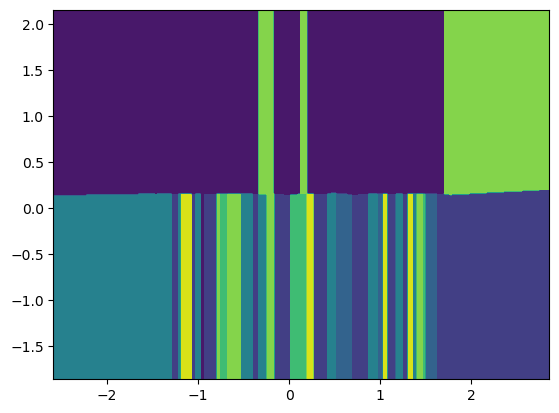

In [164]:
#classifying every point on the meshgrid
print(xx[0][0])
print(yy[0][0])
z=classify.predict(np.c_[xx.ravel(),yy.ravel()])
z=z.reshape(xx.shape)
plt.contourf(xx,yy,z)

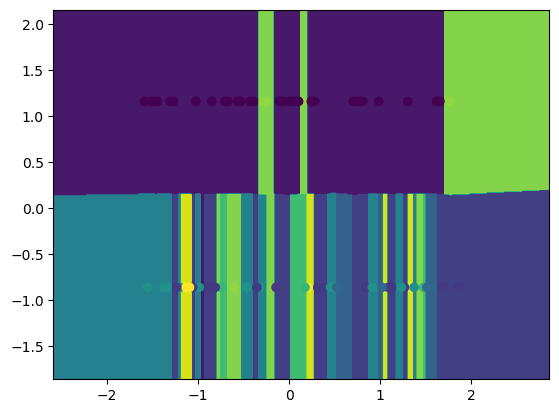

In [174]:
#plotting all the training data on the plot
plt.contourf(xx,yy,z)
plt.scatter(x_train_scaled[:,0],x_train_scaled[:,1],c=y_train)